## Data loading and selection:

In [ ]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
install.packages("leaps")
install.packages("R.utils")
install.packages("lmtest")
install.packages("fitdistrplus")
install.packages("car")
install.packages("broom")
install.packages("Boruta")
install.packages("olsrr")
install.packages("tidyverse")
install.packages("caret")
library(tidyverse)
library(caret)
library(leaps)
library(R.utils)
library(lmtest)
library(fitdistrplus)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/leaps_3.1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 28558 bytes (27 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to c

In [ ]:
%%R

data <- read.csv('avocado_all_modified.csv')
variable <- names(data)
names(data)

 [1] "X"                              "Date..Beg.1.4.2015."           
 [3] "AveragePrice"                   "Total.Volume"                  
 [5] "X4046"                          "X4225"                         
 [7] "X4770"                          "Total.Bags"                    
 [9] "Small.Bags"                     "Large.Bags"                    
[11] "XLarge.Bags"                    "type.conventional.0.organic.1."
[13] "year"                          


## Part 1: Descriptive analysis



### Histograms and Fitted Distributions

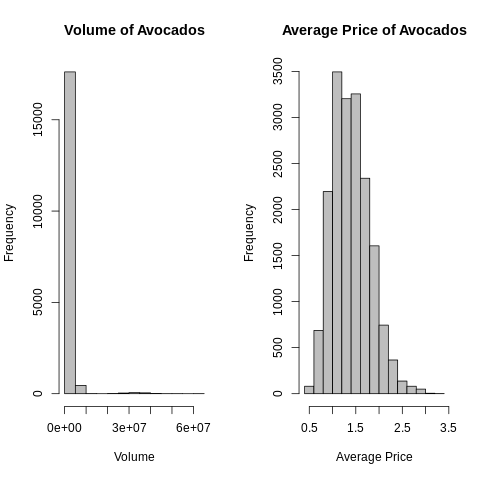

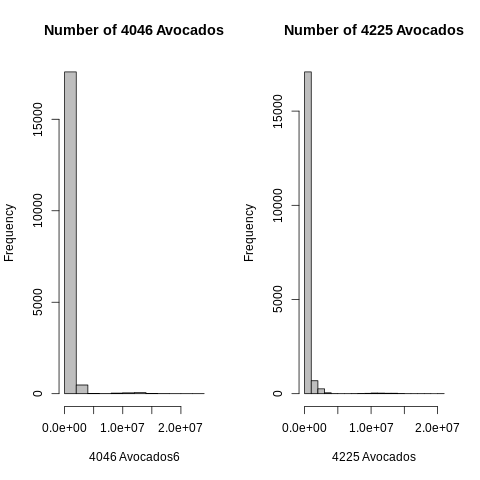

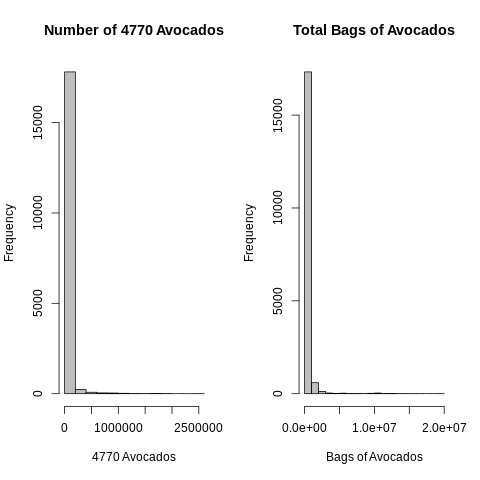

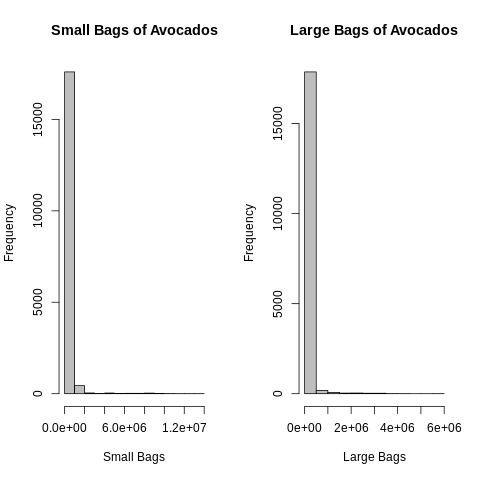

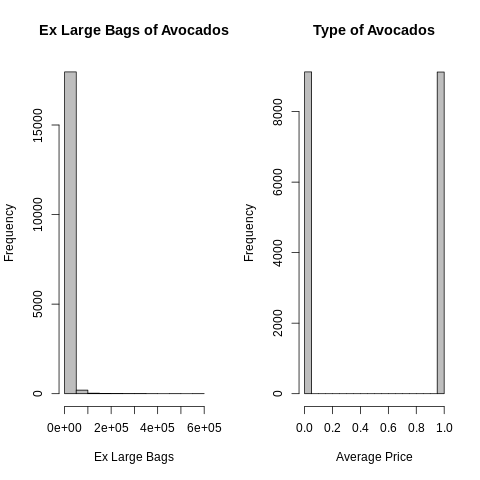

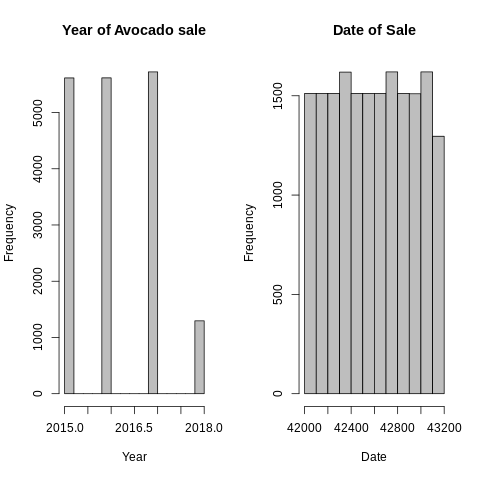

In [ ]:
%%R
options(repr.plot.width=20, repr.plot.height=8) # Creates an enlarged graph
par(mfrow=c(1, 2))
hist(data$Total.Volume, col='grey', main ="Volume of Avocados", xlab = "Volume", ylab = "Frequency")
hist(data$AveragePrice, col='grey', main ="Average Price of Avocados", xlab = "Average Price", ylab = "Frequency")

options(repr.plot.width=12, repr.plot.height=8) # Creates an enlarged graph
par(mfrow=c(1, 2))
hist(data$X4046, col='grey', main ="Number of 4046 Avocados", xlab = "4046 Avocados6", ylab = "Frequency")
hist(data$X4225, col='grey', main ="Number of 4225 Avocados", xlab = "4225 Avocados", ylab = "Frequency")

options(repr.plot.width=12, repr.plot.height=8) # Creates an enlarged graph
par(mfrow=c(1, 2))
hist(data$X4770, col='grey', main ="Number of 4770 Avocados", xlab = "4770 Avocados", ylab = "Frequency")
hist(data$Total.Bags, col='grey', main ="Total Bags of Avocados", xlab = "Bags of Avocados", ylab = "Frequency")

options(repr.plot.width=12, repr.plot.height=8) # Creates an enlarged graph
par(mfrow=c(1, 2))
hist(data$Small.Bags, col='grey', main ="Small Bags of Avocados", xlab = "Small Bags", ylab = "Frequency")
hist(data$Large.Bags, col='grey', main ="Large Bags of Avocados", xlab = "Large Bags", ylab = "Frequency")

options(repr.plot.width=12, repr.plot.height=8) # Creates an enlarged graph
par(mfrow=c(1, 2))
hist(data$XLarge.Bags, col='grey', main ="Ex Large Bags of Avocados", xlab = "Ex Large Bags", ylab = "Frequency")
hist(data$'type.conventional.0.organic.1.', col='grey', main ="Type of Avocados", xlab = "Average Price", ylab = "Frequency")

options(repr.plot.width=12, repr.plot.height=8) # Creates an enlarged graph
par(mfrow=c(1, 2))
hist(data$year, col='grey', main ="Year of Avocado sale", xlab = "Year", ylab = "Frequency")
hist(data$"Date..Beg.1.4.2015.", col='grey', main ="Date of Sale", xlab = "Date", ylab = "Frequency")

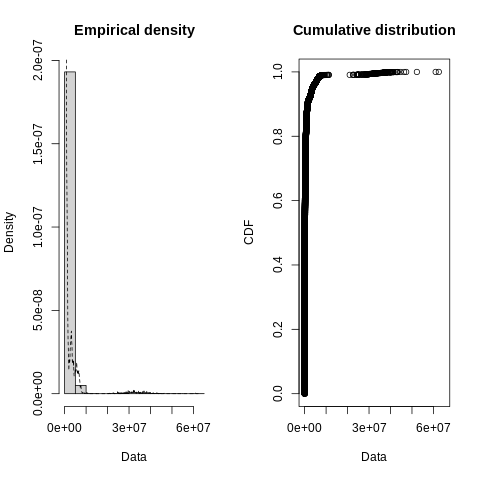

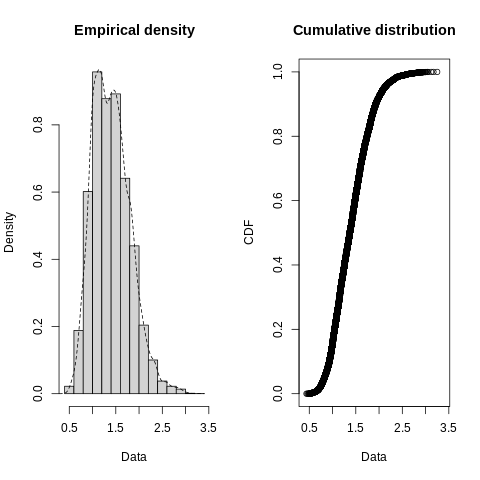

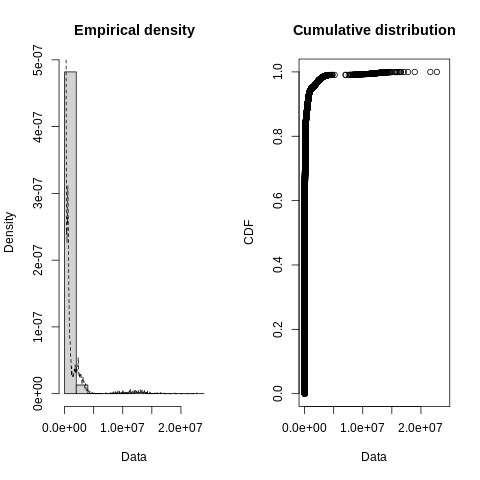

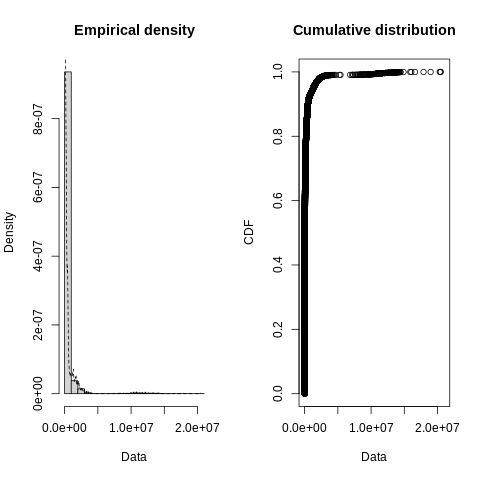

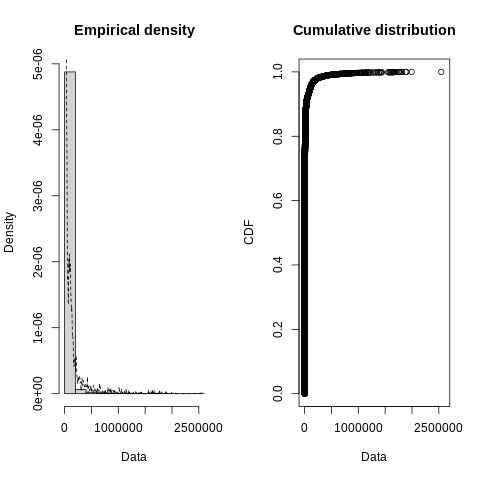

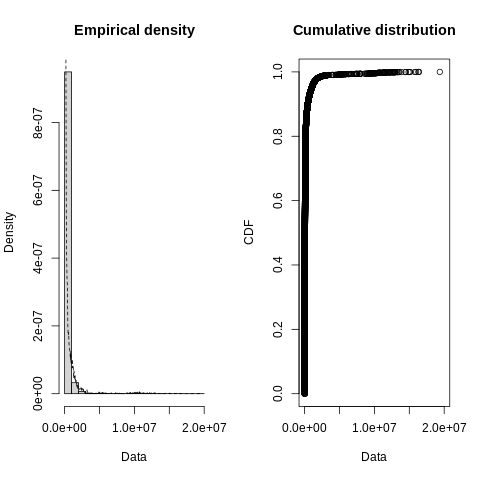

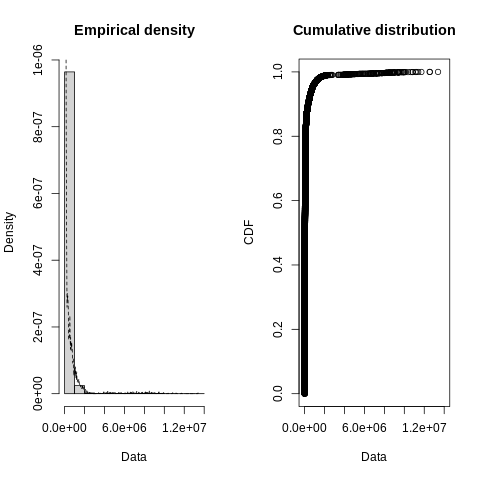

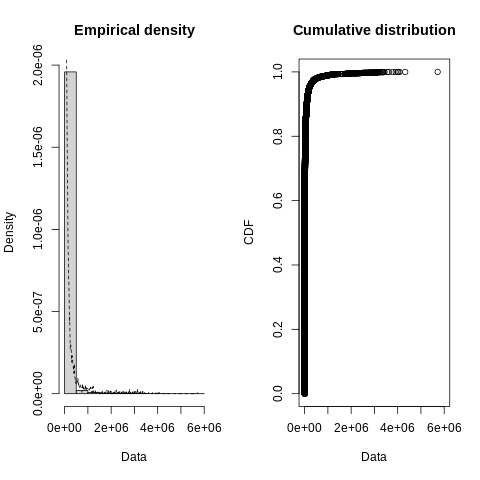

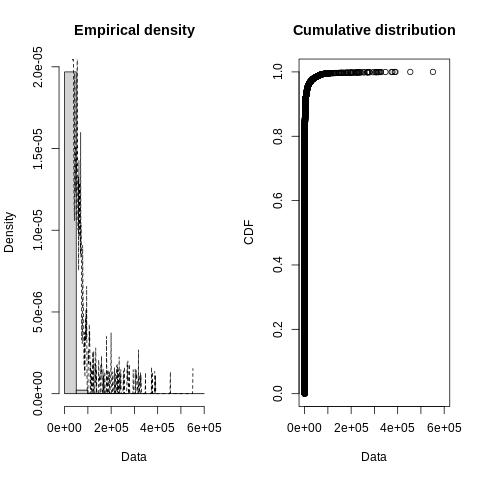

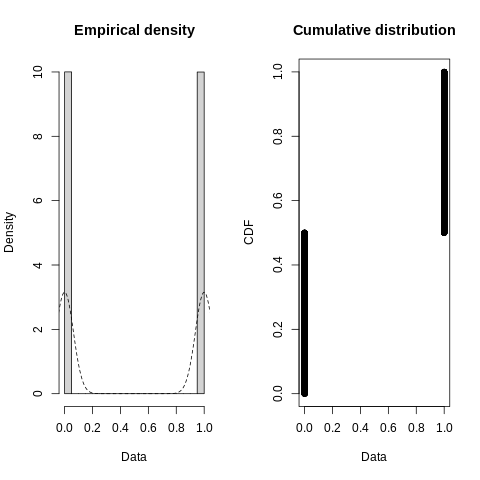

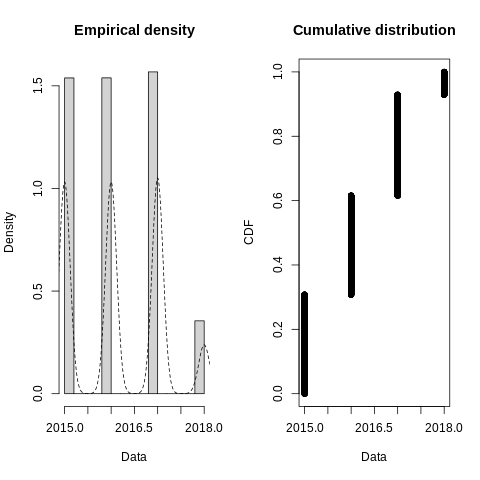

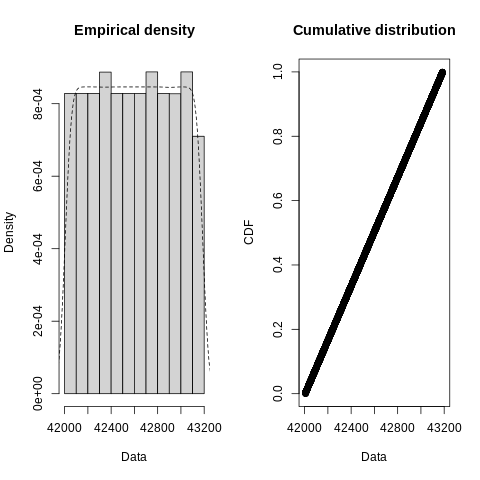

In [ ]:
%%R
options(repr.plot.width=20, repr.plot.height=8) # Creates an enlarged graph
par(mfrow=c(1, 2)) #Creates two graphs on the enlarged area
plotdist(data$Total.Volume, histo = TRUE, demp = TRUE) # Plots the histogram and fitted distribution, along with CDF.

options(repr.plot.width=20, repr.plot.height=8) # Creates an enlarged graph
par(mfrow=c(1, 2))#Creates two graphs on the enlarged area
plotdist(data$AveragePrice, histo = TRUE, demp = TRUE)# Plots the histogram and fitted distribution, along with CDF.

options(repr.plot.width=20, repr.plot.height=8) # Creates an enlarged graph
par(mfrow=c(1, 2))#Creates two graphs on the enlarged area
plotdist(data$X4046, histo = TRUE, demp = TRUE) # Plots the histogram and fitted distribution, along with CDF.

options(repr.plot.width=20, repr.plot.height=8) # Creates an enlarged graph
par(mfrow=c(1, 2))#Creates two graphs on the enlarged area
plotdist(data$X4225, histo = TRUE, demp = TRUE) # Plots the histogram and fitted distribution, along with CDF.

options(repr.plot.width=20, repr.plot.height=8) # Creates an enlarge graph
par(mfrow=c(1, 2))#Creates two graphs on the enlarged area
plotdist(data$X4770, histo = TRUE, demp = TRUE) # Plots the histogram and fitted distribution, along with CDF.

options(repr.plot.width=20, repr.plot.height=8) # Creates an enlarge graph
par(mfrow=c(1, 2))#Creates two graphs on the enlarged area
plotdist(data$Total.Bags, histo = TRUE, demp = TRUE) # Plots the histogram and fitted distribution, along with CDF.

options(repr.plot.width=20, repr.plot.height=8) # Creates an enlarge graph
par(mfrow=c(1, 2))#Creates two graphs on the enlarged area
plotdist(data$Small.Bags, histo = TRUE, demp = TRUE) # Plots the histogram and fitted distribution, along with CDF.

options(repr.plot.width=20, repr.plot.height=8) # Creates an enlarge graph
par(mfrow=c(1, 2))#Creates two graphs on the enlarged area
plotdist(data$Large.Bags, histo = TRUE, demp = TRUE) # Plots the histogram and fitted distribution, along with CDF.

options(repr.plot.width=20, repr.plot.height=8) # Creates an enlarge graph
par(mfrow=c(1, 2))#Creates two graphs on the enlarged area
plotdist(data$XLarge.Bags, histo = TRUE, demp = TRUE) # Plots the histogram and fitted distribution, along with CDF.

options(repr.plot.width=20, repr.plot.height=8) # Creates an enlarge graph
par(mfrow=c(1, 2))#Creates two graphs on the enlarged area
plotdist(data$'type.conventional.0.organic.1.', histo = TRUE, demp = TRUE) # Plots the histogram and fitted distribution, along with CDF.

options(repr.plot.width=20, repr.plot.height=8) # Creates an enlarge graph
par(mfrow=c(1, 2))#Creates two graphs on the enlarged area
plotdist(data$year, histo = TRUE, demp = TRUE) # Plots the histogram and fitted distribution, along with CDF.

options(repr.plot.width=20, repr.plot.height=8) # Creates an enlarge graph
par(mfrow=c(1, 2))#Creates two graphs on the enlarged area
plotdist(data$'Date..Beg.1.4.2015.', histo = TRUE, demp = TRUE) # Plots the histogram and fitted distribution, along with CDF.

### Correlation Matrix

In [ ]:
%%R
install.packages("ggplot2")        #install packages for correlation plotting matrix
install.packages("GGally")
 
library("ggplot2")                    
library("GGally")

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggplot2_3.3.6.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 3061989 bytes (2.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

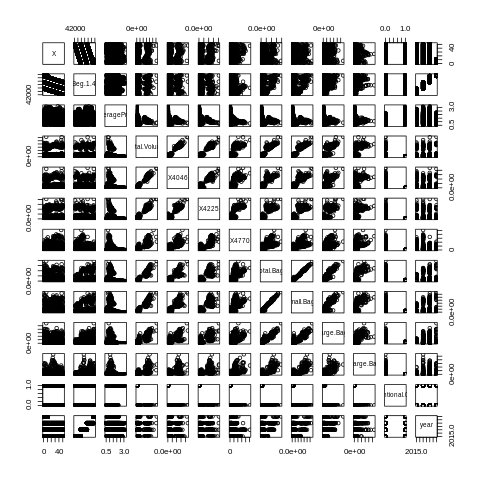

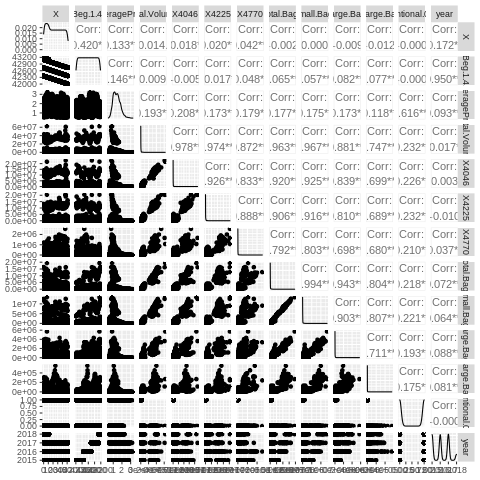

In [ ]:
%%R
options(repr.plot.width = 20, repr.plot.height=8) # Creates Enlarged graph
pairs(data)
ggpairs(data)                          # Apply ggpairs function

### Boxplots

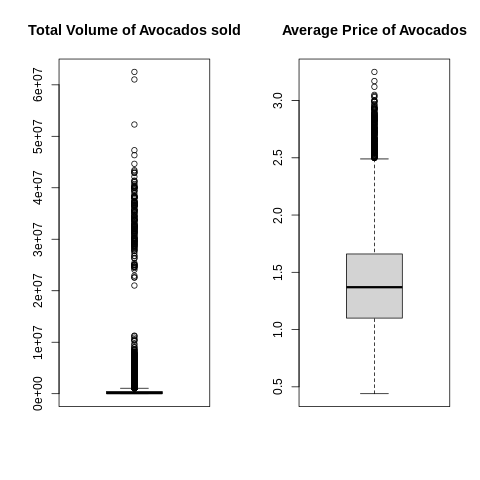

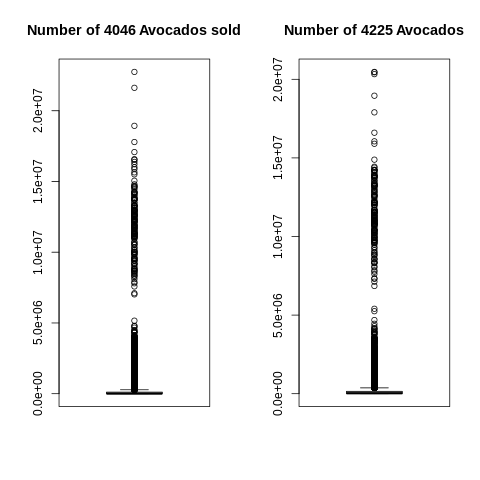

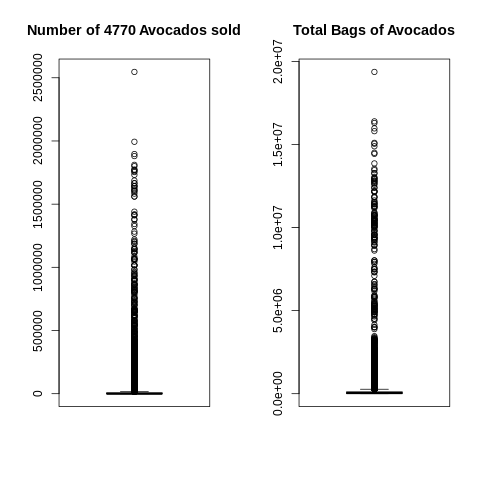

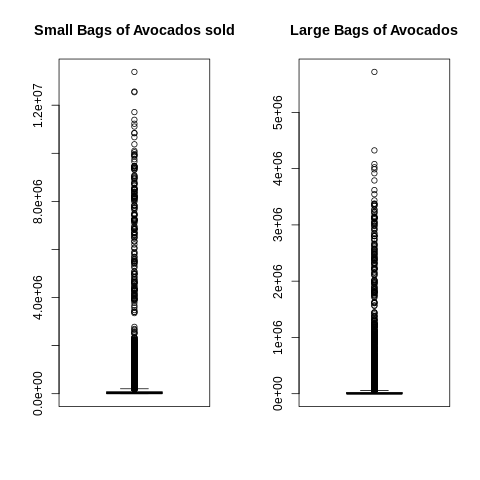

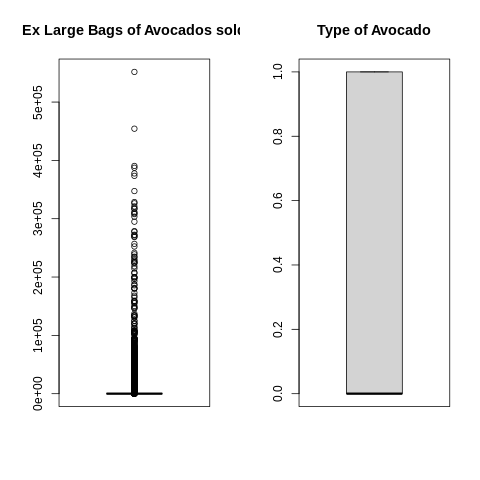

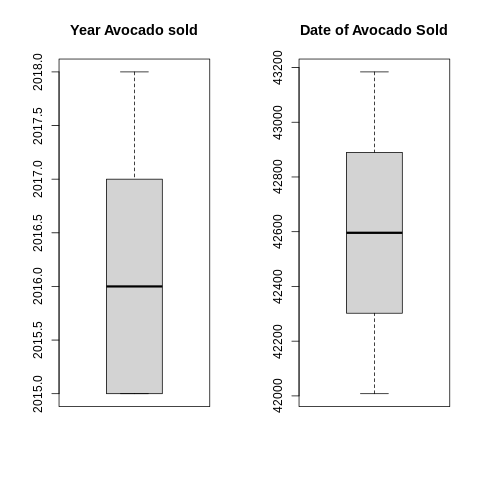

In [ ]:
%%R
options(repr.plot.width = 20, repr.plot.height=8) # Creates Enlarged graph
par(mfrow=c(1, 2)) # divide graph area in 2 columns
boxplot(data$Total.Volume, main="Total Volume of Avocados sold")  
boxplot(data$AveragePrice, main="Average Price of Avocados")
options(repr.plot.width = 20, repr.plot.height=8) # Enlarges the graphs for better visualization
par(mfrow=c(1, 2)) # divide graph area in 2 columns
boxplot(data$X4046, main="Number of 4046 Avocados sold")  
boxplot(data$X4225, main="Number of 4225 Avocados")
options(repr.plot.width = 20, repr.plot.height=8) # Enlarges the graphs for better visualization
par(mfrow=c(1, 2)) # divide graph area in 2 columns
boxplot(data$X4770, main="Number of 4770 Avocados sold")  
boxplot(data$Total.Bags, main="Total Bags of Avocados")
options(repr.plot.width = 20, repr.plot.height=8) # Enlarges the graphs for better visualization
par(mfrow=c(1, 2)) # divide graph area in 2 columns
boxplot(data$Small.Bags, main="Small Bags of Avocados sold")  
boxplot(data$Large.Bags, main="Large Bags of Avocados")
options(repr.plot.width = 20, repr.plot.height=8) # Enlarges the graphs for better visualization
par(mfrow=c(1, 2)) # divide graph area in 2 columns
boxplot(data$XLarge.Bags, main="Ex Large Bags of Avocados sold")  
boxplot(data$'type.conventional.0.organic.1.', main="Type of Avocado")
options(repr.plot.width = 20, repr.plot.height=8) # Enlarges the graphs for better visualization
par(mfrow=c(1, 2)) # divide graph area in 2 columns
boxplot(data$year, main="Year Avocado sold")  
boxplot(data$"Date..Beg.1.4.2015.", main="Date of Avocado Sold")

### Scatterplots

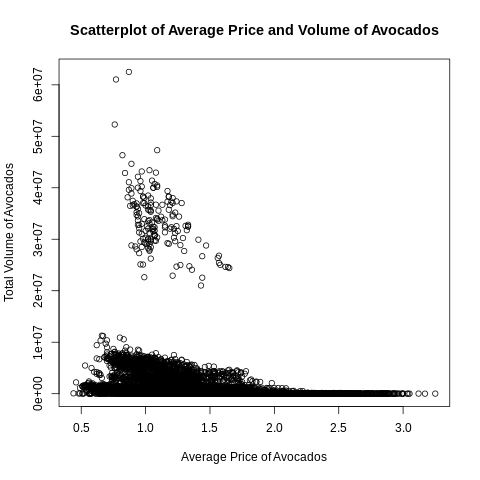

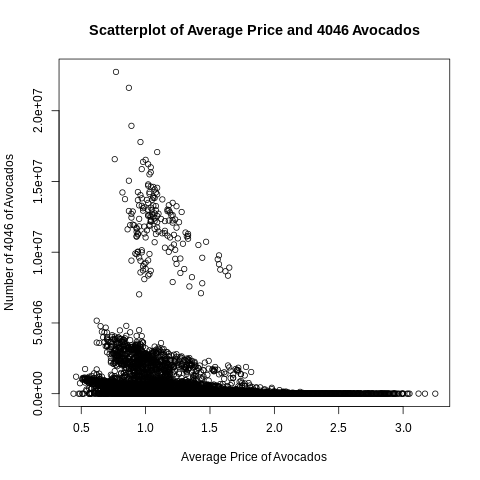

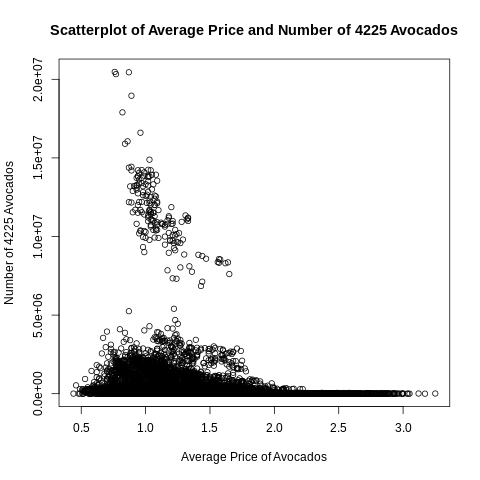

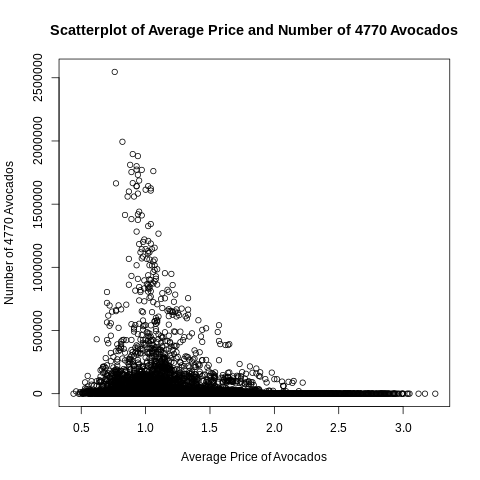

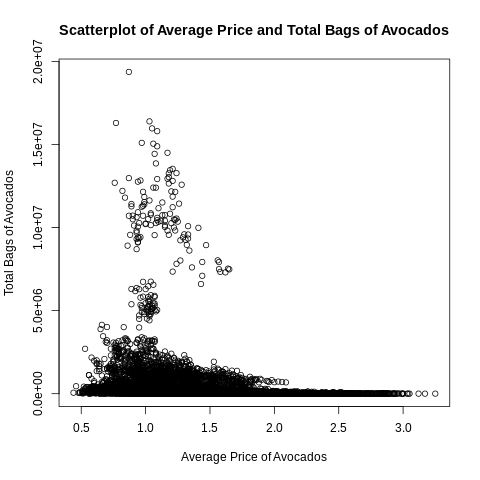

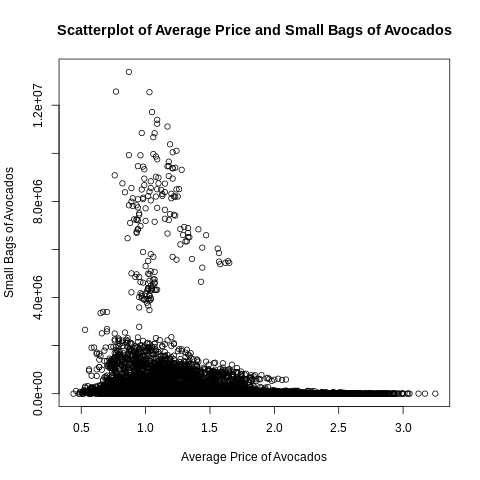

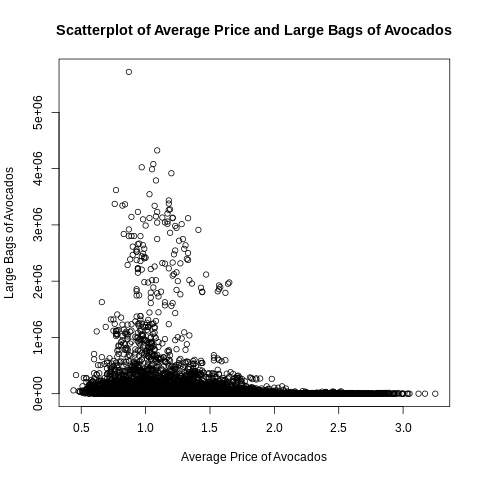

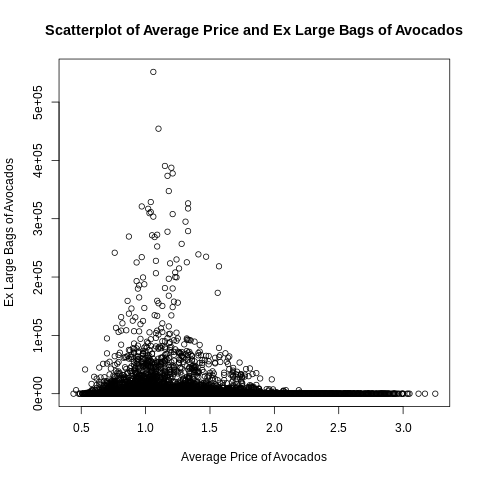

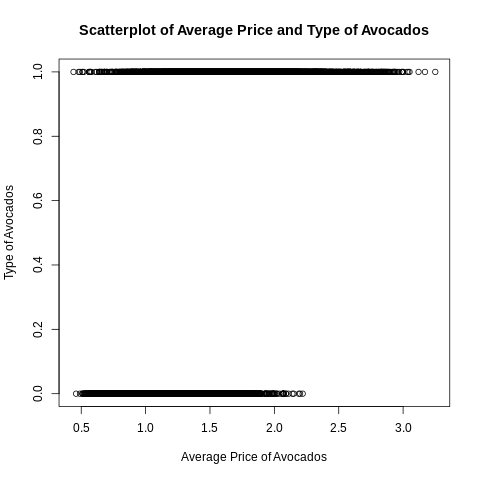

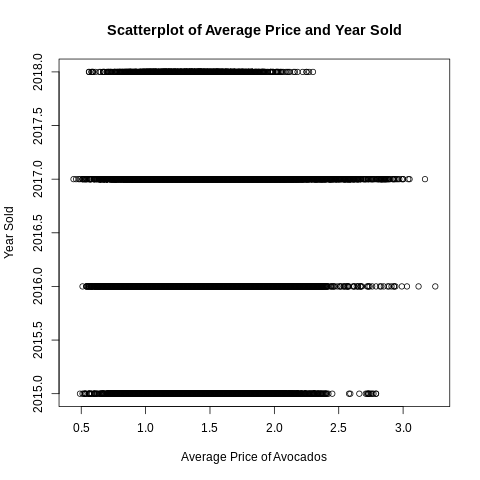

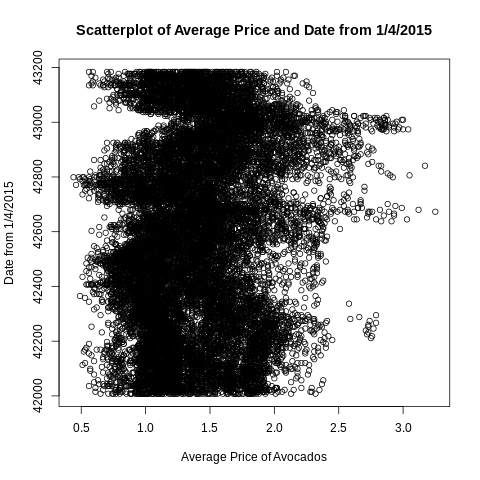

In [ ]:
%%R
options(repr.plot.width=8, repr.plot.height=8) # Enlarges the graphs for better visualization
plot(data$AveragePrice, data$Total.Volume, xlab="Average Price of Avocados", ylab="Total Volume of Avocados",
main ="Scatterplot of Average Price and Volume of Avocados", type ="p") # This generates the scatterplot

options(repr.plot.width=8, repr.plot.height=8) # Enlarges the graphs for better visualization
plot(data$AveragePrice, data$X4046, xlab="Average Price of Avocados", ylab="Number of 4046 of Avocados",
main ="Scatterplot of Average Price and 4046 Avocados", type ="p") # This generates the scatterplot

options(repr.plot.width=8, repr.plot.height=8) # Enlarges the graphs for better visualization
plot(data$AveragePrice, data$X4225, xlab="Average Price of Avocados", ylab="Number of 4225 Avocados",
main ="Scatterplot of Average Price and Number of 4225 Avocados", type ="p") # This generates the scatterplot

options(repr.plot.width=8, repr.plot.height=8) # Enlarges the graphs for better visualization
plot(data$AveragePrice, data$X4770, xlab="Average Price of Avocados", ylab="Number of 4770 Avocados",
main ="Scatterplot of Average Price and Number of 4770 Avocados", type ="p") # This generates the scatterplot

options(repr.plot.width=8, repr.plot.height=8) # Enlarges the graphs for better visualization
plot(data$AveragePrice, data$Total.Bags, xlab="Average Price of Avocados", ylab="Total Bags of Avocados",
main ="Scatterplot of Average Price and Total Bags of Avocados", type ="p") # This generates the scatterplot

options(repr.plot.width=8, repr.plot.height=8) # Enlarges the graphs for better visualization
plot(data$AveragePrice, data$Small.Bags, xlab="Average Price of Avocados", ylab="Small Bags of Avocados",
main ="Scatterplot of Average Price and Small Bags of Avocados", type ="p") # This generates the scatterplot

options(repr.plot.width=8, repr.plot.height=8) # Enlarges the graphs for better visualization
plot(data$AveragePrice, data$Large.Bags, xlab="Average Price of Avocados", ylab="Large Bags of Avocados",
main ="Scatterplot of Average Price and Large Bags of Avocados", type ="p") # This generates the scatterplot

options(repr.plot.width=8, repr.plot.height=8) # Enlarges the graphs for better visualization
plot(data$AveragePrice, data$XLarge.Bags, xlab="Average Price of Avocados", ylab="Ex Large Bags of Avocados",
main ="Scatterplot of Average Price and Ex Large Bags of Avocados", type ="p") # This generates the scatterplot

options(repr.plot.width=8, repr.plot.height=8) # Enlarges the graphs for better visualization
plot(data$AveragePrice, data$'type.conventional.0.organic.1.', xlab="Average Price of Avocados", ylab="Type of Avocados",
main ="Scatterplot of Average Price and Type of Avocados", type ="p") # This generates the scatterplot

options(repr.plot.width=8, repr.plot.height=8) # Enlarges the graphs for better visualization
plot(data$AveragePrice, data$year, xlab="Average Price of Avocados", ylab="Year Sold",
main ="Scatterplot of Average Price and Year Sold", type ="p") # This generates the scatterplot

options(repr.plot.width=8, repr.plot.height=8) # Enlarges the graphs for better visualization
plot(data$AveragePrice, data$"Date..Beg.1.4.2015.", xlab="Average Price of Avocados", ylab="Date from 1/4/2015",
main ="Scatterplot of Average Price and Date from 1/4/2015", type ="p") # This generates the scatterplot

### Statistical Summary

In [ ]:
%%R
Print('Total Volume')
print(fivenum(data$Total.Volume))
print('Average Price')
print(fivenum(data$AveragePrice))
print('4046 Avocados')
print(fivenum(data$X4046))
print('4225 Avocados')
print(fivenum(data$X4225))
print('4770 Avocados')
print(fivenum(data$X4770))
print('Total Bags')
print(fivenum(data$Total.Bags))
print('Small Bags')
print(fivenum(data$Small.Bags))
print('Large Bags')
print(fivenum(data$Large.Bags))
print('XL Bags')
print(fivenum(data$XLarge.Bags))
print('Type')
print(fivenum(data$'type.conventional.0.organic.1.'))
print('Year')
print(fivenum(data$year))
print('Date')
print(fivenum(data$"Date..Beg.1.4.2015."))

R[write to console]: Error in Print("Total Volume") : could not find function "Print"




Error in Print("Total Volume") : could not find function "Print"


RInterpreterError: ignored

## Part 2: Multiple Regression Model



In [ ]:
%%R

fit <- lm(data$AveragePrice ~ data$Total.Volume + data$X4046 + data$X4225 + data$X4770 + data$Total.Bags + data$Small.Bags + data$Large.Bags + data$XLarge.Bags + data$'type.conventional.0.organic.1.' + data$year, data = data)
summary(fit) # show results
#Comments: 
#Interpretation of coefficients: 
#The Average Price coefficient is -1.626e+00, which is negative, so an increase in price of avocados causes a decrease in volume of avocados.
#The Rest of the variables have a positive coefficient, and therefore, an increase in any of these variables will lead to an increase in Total 
#Volume of Avocados.The t values are quite high, which means that there is a lower chance of rejecting the null, and therefore the 
#variables are statistically significant.


Part 3 Remove Outliers-No outliers noted

Part 4 Mallows' Cp and Boruta Algorithm

In [ ]:
%%R
library(leaps)
library(car)
library(broom)

In [ ]:
%%R
mreg.mod5 <- lm(data$AveragePrice ~ data$Total.Volume + data$X4046 + data$X4225 + data$X4770 + data$Total.Bags + data$Small.Bags + data$Large.Bags + data$XLarge.Bags + data$'type.conventional.0.organic.1.' + data$year, data = data)

ss=regsubsets(data$AveragePrice ~ data$Total.Volume + data$X4046 + data$X4225 + data$X4770 + data$Total.Bags + data$Small.Bags + data$Large.Bags + data$XLarge.Bags + data$'type.conventional.0.organic.1.' + data$year,method=c("exhaustive"),nbest=8,data=data)
#Using subsets and summary to determine the best variables to eliminate
subsets(ss,statistic="cp",legend=F,main="Mallows CP",col="steelblue4")
summary(ss)

In [ ]:
%%R
library(Boruta)

In [ ]:
%%R
library(olsrr)

In [ ]:
%%R
#Comparing the Mallow Cp's for the most promising models according to summary(ss)
full_model <- lm(data$AveragePrice~., data = data)

model1 <- lm(data$AveragePrice ~ data$X4046 + data$X4225 + data$X4770 + data$Total.Bags + data$Large.Bags + data$XLarge.Bags + data$'type.conventional.0.organic.1.' + data$year, data = data)
model2 <- lm(data$AveragePrice ~ data$X4046 + data$X4225 + data$X4770 + data$Total.Bags + data$XLarge.Bags + data$'type.conventional.0.organic.1.' + data$year, data = data)
model3 <- lm(data$AveragePrice ~ data$X4046 + data$X4225 + data$X4770 + data$Small.Bags + data$'type.conventional.0.organic.1.' + data$year, data = data)

ols_mallows_cp(model1, full_model)
#All three models have higher Mallow C than full model, Mallow C test tells us not to eliminate any variable


In [ ]:
%%R
#Boruta Algorithm Importance Chart
Bor.res <- Boruta(AveragePrice~., data = data, doTrace = 2)
#plot(Bor.res,sort=TRUE)
plot(Bor.res, xlab = "", xaxt = "n", main="Boruta Algorithm Feature Importance")
lz<-lapply(1:ncol(Bor.res$ImpHistory),function(i)
Bor.res$ImpHistory[is.finite(Bor.res$ImpHistory[,i]),i])
names(lz) <- colnames(Bor.res$ImpHistory)
Labels <- sort(sapply(lz,median))
axis(side = 1,las=2,labels = names(Labels),
at = 1:ncol(Bor.res$ImpHistory), cex.axis = 0.7)
#all factors are considered important by Boruta Alogrithm

Part 5 MultiCollinearity Test

In [ ]:
%%R
#Using a correlation matrix to see which variables have high correlation
datamatrix <- data[ , c("Total.Volume", "X4046", "X4225", "X4770", "Total.Bags", "Small.Bags", "Large.Bags", "XLarge.Bags", 'type.conventional.0.organic.1.', "year")]
#data$AveragePrice ~ data$Total.Volume + data$X4046 + data$X4225 + data$X4770 + data$Total.Bags + data$Small.Bags + data$Large.Bags + data$XLarge.Bags + data$'type.conventional.0.organic.1.' + data$year, data = data)

cor(datamatrix)
#Almost all variables correlated with volume needs to be eliminated

In [ ]:
%%R
#Using VIF to eliminated variables
col_model <- lm(data$Total.Volume ~ data$X4046 + data$X4225 + data$X4770 + data$Total.Bags + data$Small.Bags + data$Large.Bags + data$XLarge.Bags + data$'type.conventional.0.organic.1.' + data$year, data = data)
vif(col_model)
#Elimiate all alues with vif>5 since they are correlated with total volume, eliminate: X4046, X4225, X4770, Total.Bags, Small.Bags, Large.Bags, XLarge.Bags data
#New Model: lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year, data = data)

Part 6

In [ ]:
%%R
model <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year, data = data)
#change "residual" and "yhat" to the name of the variable from part 5
plot(model)
#line go through 0
abline(0,0)

qqnorm(model)
qqline(h=0)


In [ ]:
#base of the graph the overall data is well fitted within the regression, at the low, the actual value appear to be lower than the predicted and at the high the actual value is slightly higher.

Part 7

In [ ]:
%%R
library(lmtest)
#Reset test, testing if non-linear variables of fitted value explains the resonse variables, (detecting omitted variables and inappropriate functional form)
#need to define regressor x and linear relationship y1, y2 and etc. 
model <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year, data = data)
resettest(model)

In [ ]:
#P-Value lies in the reject region, non-linear combination does not explain response variable

Part 8

In [ ]:
%%R
library(lmtest)
model <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year, data = data)
bptest(model)

In [ ]:
#Rejec

Part 9 Interaction Models

In [ ]:
%%R
#We assume total volume changes based on the year the avocado was sold and the type of avocado sold, we will test the interaction between these three terms

model_interaction1 <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year + data$Total.Volume*data$'type.conventional.0.organic.1.'*data$year, data=data)
summary(model_interaction1)

year <- c(2015, 2018)
avo_type <-c(0,1)

b3 <- coef(model_interaction1)[[3]]
b4 <- coef(model_interaction1)[[4]]
b5 <- coef(model_interaction1)[[5]]
(DpDa <- b3+b4+b5*year*avo_type)
#Model shows average price changes between years 2015-2018 and avocado type

In [ ]:
#AIC testing possible interaction models
%%R
model_interaction <- lm(data$AveragePrice ~ data$Total.Volume + data$year + data$Total.Volume*data$year, data=data)

mreg.mod0 <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year, data=data)
mreg.mod1 <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year + data$Total.Volume*data$'type.conventional.0.organic.1.', data=data)
mreg.mod2 <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year + data$'type.conventional.0.organic.1.'*data$year, data=data)
mreg.mod3 <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year + data$Total.Volume*data$'type.conventional.0.organic.1.'*data$year, data=data)
mreg.mod4 <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year + data$Total.Volume*data$'type.conventional.0.organic.1.' + data$Total.Volume*data$'type.conventional.0.organic.1.'*data$year, data=data)
mreg.mod5 <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year + data$'type.conventional.0.organic.1.'*data$year + data$Total.Volume*data$'type.conventional.0.organic.1.'*data$year, data=data)
mreg.mod6 <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year + data$Total.Volume*data$'type.conventional.0.organic.1.' +  data$'type.conventional.0.organic.1.'*data$year + data$Total.Volume*data$'type.conventional.0.organic.1.'*data$year, data=data)

AIC(mreg.mod0, mreg.mod1, mreg.mod2, mreg.mod3,mreg.mod4,mreg.mod5,mreg.mod6)
#AIC shows mod3 as preferred

In [ ]:
%%R
#BIC testing possible interaction models
mreg.mod0 <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year, data=data)
mreg.mod1 <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year + data$Total.Volume*data$'type.conventional.0.organic.1.', data=data)
mreg.mod2 <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year + data$'type.conventional.0.organic.1.'*data$year, data=data)
mreg.mod3 <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year + data$Total.Volume*data$'type.conventional.0.organic.1.'*data$year, data=data)
mreg.mod4 <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year + data$Total.Volume*data$'type.conventional.0.organic.1.' + data$Total.Volume*data$'type.conventional.0.organic.1.'*data$year, data=data)
mreg.mod5 <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year + data$'type.conventional.0.organic.1.'*data$year + data$Total.Volume*data$'type.conventional.0.organic.1.'*data$year, data=data)
mreg.mod6 <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year + data$Total.Volume*data$'type.conventional.0.organic.1.' +  data$'type.conventional.0.organic.1.'*data$year + data$Total.Volume*data$'type.conventional.0.organic.1.'*data$year, data=data)

BIC(mreg.mod0, mreg.mod1, mreg.mod2, mreg.mod3,mreg.mod4,mreg.mod5,mreg.mod6)
#BIC shows mod3 as preferred
#Both AIC and BIC suggests the best model is: lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year + data$Total.Volume*data$'type.conventional.0.organic.1.'*data$year, data=data)
updated_model <- lm(data$AveragePrice ~ data$Total.Volume + data$'type.conventional.0.organic.1.' + data$year + data$Total.Volume*data$'type.conventional.0.organic.1.'*data$year, data=data)

Part 10

In [ ]:
%%R
# Compare Train/Test:
set.seed(200)
#row.number <- sample(1:nrow(data), 0.75*nrow(data))
train = data[data$AveragePrice,]
test = data[-data$AveragePrice,]
#dim(train)
predictions <- updated_model ~ predict(test.data)


In [ ]:
dim(test)
dim(train)

In [ ]:
%%R
reg.finalmod = lm(updated_model, data=train)
plot(reg.finalmod)

In [ ]:
%%R
#sqrt(mean((test$TotalVolume - predict(reg.finalmod, test))ˆ2))
mean((test$TotalVolume - predict.lm(updated_model, data=test)) ^ 2)
# On average the predicted value is off by

### Validation Test using 2/3 Train and 1/3 Test data.

In [ ]:
%%R
dim(data[- data$AveragePrice])
set.seed(200)
row.number <- sample(1:nrow(data), 0.66*nrow(data))
train2 = data[row.number,]
test2 = data[-row.number,]
#dim(train2)
predictions2 <- updated_model ~ predict(test.data)

In [ ]:
%%R
reg.finalmod2 = lm(updated_model, data=train2)
plot(reg.finalmod2)

In [ ]:
%%R
sqrt(mean((test2 - predictions2) ˆ 2))
# On average the predicted value is off by 

Part 11

When first analyzing the graphical analysis and first linear regression of the data set with respect to Total Volume, we found that all variables have a positive correlation(Volume increases when they increase) except the Average Price which has a negative correlation (when increased, Volume decreases.
Mallows Cp test all returned very high values for any combination of variables that did not include all variables. It suggest that we should keep all the existing variables. All variables put through Boruta algorithm showed an importance over the shadowmax, suggesting we should keep all the variables. Multicollinearity testing via VIF showed that many variabes are correlated with Total Volume. We decided to keep Total Volume since the other factors (Total bags, No. of 4046 avocados sold) seem to stem from this variable. We ended up with three predictor variables: Total Volume, Type, Year. Reset test shows model is indeed linear. Heteroskedasticity test showed no heteroskedasticity detected. Modeling interactions between our three predictor variables suggested interactions between all three variables. We used AIC and BIC testing to find the best interactions model. The partioned cross validation is more accurate than the non-partioned cross validation. Overall, we found that the average price of avocados can be modelled by three factors: year, total volume sold, and organic or not. These factors are also all related to each other.